In [ ]:
!pip install pandas matplotlib seaborn nltk


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vedantsinha123","key":"9b52a77be8b7fbef93d0ae900c783057"}'}

In [ ]:
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe


Dataset URL: https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe
License(s): CC0-1.0
  0% 0.00/45.1M [00:00<?, ?B/s]
100% 45.1M/45.1M [00:00<00:00, 1.18GB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("515k-hotel-reviews-data-in-europe.zip", "r") as zip_ref:
    zip_ref.extractall()


In [ ]:
import pandas as pd

data = pd.read_csv("Hotel_Reviews.csv")
data.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
# Combine positive and negative review into one column
data["Review"] = data["Positive_Review"] + " " + data["Negative_Review"]
data["Review"] = data["Review"].replace("No Negative", "")
data["Review"] = data["Review"].replace("No Positive", "")

data[["Review", "Reviewer_Score"]].head()


,Review,Reviewer_Score
0,Only the park outside of the hotel was beauti...,2.9
1,No real complaints the hotel was great great ...,7.5
2,Location was good and staff were ok It is cut...,7.1
3,Great location in nice surroundings the bar a...,3.8
4,Amazing location and building Romantic settin...,6.7


In [ ]:
# Use a smaller sample to test quickly
sample = data.head(1000).copy()

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Apply sentiment scoring
sample["Positive"] = sample["Review"].apply(lambda x: sentiment.polarity_scores(str(x))["pos"])
sample["Negative"] = sample["Review"].apply(lambda x: sentiment.polarity_scores(str(x))["neg"])
sample["Neutral"] = sample["Review"].apply(lambda x: sentiment.polarity_scores(str(x))["neu"])

# See the result
sample[["Review", "Positive", "Negative", "Neutral"]].head()



,Review,Positive,Negative,Neutral
0,Only the park outside of the hotel was beauti...,0.051,0.084,0.865
1,No real complaints the hotel was great great ...,0.174,0.118,0.708
2,Location was good and staff were ok It is cut...,0.138,0.122,0.740
3,Great location in nice surroundings the bar a...,0.114,0.103,0.783
4,Amazing location and building Romantic settin...,0.081,0.058,0.861


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Positive'].plot(kind='hist', bins=20, title='Positive')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Negative'].plot(kind='hist', bins=20, title='Negative')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Neutral'].plot(kind='hist', bins=20, title='Neutral')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Positive', y='Negative', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Negative', y='Neutral', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Positive']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Positive')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Negative']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Negative')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Neutral']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Neutral')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Positive'].plot(kind='line', figsize=(8, 4), title='Positive')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Negative'].plot(kind='line', figsize=(8, 4), title='Negative')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Neutral'].plot(kind='line', figsize=(8, 4), title='Neutral')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Positive', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Negative', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Neutral', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
x = sum(sample["Positive"])
y = sum(sample["Negative"])
z = sum(sample["Neutral"])

def sentiment_result(a, b, c):
    if a > b and a > c:
        print("Overall Sentiment: Positive 😊")
    elif b > a and b > c:
        print("Overall Sentiment: Negative 😠")
    else:
        print("Overall Sentiment: Neutral 🙂")

sentiment_result(x, y, z)

print("Total Positive Score:", x)
print("Total Negative Score:", y)
print("Total Neutral Score:", z)


Overall Sentiment: Neutral 🙂
Total Positive Score: 236.08299999999969
Total Negative Score: 114.70899999999993
Total Neutral Score: 649.2120000000006


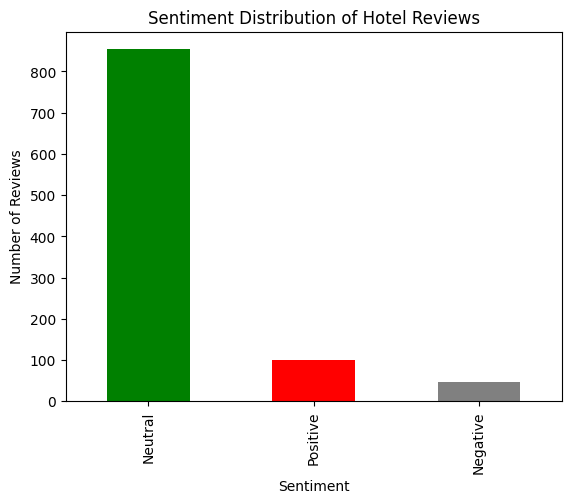

In [ ]:
import matplotlib.pyplot as plt

# Count how many reviews are mostly positive, negative, or neutral
def label_sentiment(row):
    if row["Positive"] > row["Negative"] and row["Positive"] > row["Neutral"]:
        return "Positive"
    elif row["Negative"] > row["Positive"] and row["Negative"] > row["Neutral"]:
        return "Negative"
    else:
        return "Neutral"

sample["Sentiment_Label"] = sample.apply(label_sentiment, axis=1)

# Plot bar chart
sample["Sentiment_Label"].value_counts().plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution of Hotel Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [ ]:
def analyze_user_review(text):
    score = sentiment.polarity_scores(text)
    print("Your Sentiment Scores:")
    print(score)
    if score["pos"] > score["neg"] and score["pos"] > score["neu"]:
        print("✅ Positive 😊")
    elif score["neg"] > score["pos"] and score["neg"] > score["neu"]:
        print("❌ Negative 😠")
    else:
        print("😐 Neutral 🙂")

# Try it!
user_review = input("Type your hotel review here: ")
analyze_user_review(user_review)


Type your hotel review here: staff was fine but needs more cleaning
Your Sentiment Scores:
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.1027}
😐 Neutral 🙂
